### 1. Data Wrangling

In [1]:
 # Import libraries:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation
from datetime import datetime

# Filepath
filepath = r'C:\Users\serve\OneDrive\Desktop\NFL_Big_Databowl'

# Make a list of the files
files = os.listdir(filepath)

In [2]:
# Make a list of dataframes
df_names = []
for file in files:
    globals()[file[:-4]] = pd.read_csv(filepath+'\\'+file)
    df_names.append(file[:-4])

We will concatenate week dataframes before we merge the others:

In [3]:
# Make a list of week dataframes
weeks = [week1, week2, week3, week4, week5, week6, week7, week8]
# Concatenate weeks
df = pd.concat(weeks)
#Let's check the missing data
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values_list = missing_values[missing_values>=1]
missing_values_list

nflId           361486
jerseyNumber    361486
o               361486
dir             361486
dtype: int64

In [4]:
df.head()

,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event
0,2021090900,97,25511.0,1,2021-09-10T00:26:31.100,12.0,TB,right,37.77,24.22,0.29,0.30,0.03,165.16,84.99,None
1,2021090900,97,25511.0,2,2021-09-10T00:26:31.200,12.0,TB,right,37.78,24.22,0.23,0.11,0.02,164.33,92.87,None
2,2021090900,97,25511.0,3,2021-09-10T00:26:31.300,12.0,TB,right,37.78,24.24,0.16,0.10,0.01,160.24,68.55,None
3,2021090900,97,25511.0,4,2021-09-10T00:26:31.400,12.0,TB,right,37.73,24.25,0.15,0.24,0.06,152.13,296.85,None
4,2021090900,97,25511.0,5,2021-09-10T00:26:31.500,12.0,TB,right,37.69,24.26,0.25,0.18,0.04,148.33,287.55,None


In [8]:
pffScoutingData.head()

,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock
0,2021090900,97,25511,Pass,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021090900,97,35481,Pass Route,TE-L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021090900,97,35634,Pass Route,LWR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021090900,97,39985,Pass Route,HB-R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021090900,97,40151,Pass Block,C,NaN,NaN,NaN,0.0,0.0,0.0,0.0,44955.0,SW,0.0


In [23]:
# Fill the missing values with zero. When value is NA, row corresponds to ball.
df = df.dropna()

In [24]:
# Let's check the players dataframe for missing values:
players.isna().sum()

nflId                 0
height                0
weight                0
birthDate           232
collegeName         224
officialPosition      0
displayName           0
dtype: int64

In [25]:
# Let's Check if games dataframe has any missing data
games.isna().sum()

gameId             0
season             0
week               0
gameDate           0
gameTimeEastern    0
homeTeamAbbr       0
visitorTeamAbbr    0
dtype: int64

In [26]:
# Fill the missing college names with 'other', since dtype is object
players['collegeName'] = players['collegeName'].fillna('other')

In [27]:
# Fill the missing birthDates with average
players['birthDate'] = players['birthDate'].fillna(str(pd.to_datetime(
    players.birthDate, errors='coerce').mean())[0:10])

In [28]:
# Let's check the plays dataframe for missing values:
print(plays.isna().sum())
print(type(plays.info()))

gameId                       0
playId                       0
playDescription              0
quarter                      0
down                         0
yardsToGo                    0
possessionTeam               0
defensiveTeam                0
yardlineSide               125
yardlineNumber               0
gameClock                    0
preSnapHomeScore             0
preSnapVisitorScore          0
passResult                   0
penaltyYards              7801
prePenaltyPlayResult         0
playResult                   0
foulName1                 7821
foulNFLId1                7821
foulName2                 8527
foulNFLId2                8527
foulName3                 8556
foulNFLId3                8556
absoluteYardlineNumber       1
offenseFormation             7
personnelO                   1
defendersInBox               7
personnelD                   1
dropBackType               528
pff_playAction               0
pff_passCoverage             0
pff_passCoverageType         0
dtype: i

In [29]:
# Some variables are empty for almost all cels, so we will drop them
plays = plays.drop(columns=['penaltyYards',  'foulName1',
       'foulNFLId1', 'foulName2', 'foulNFLId2', 'foulName3', 'foulNFLId3'])

In [30]:
# We will fill the missing objetcs with 'other'
plays[['yardlineSide','dropBackType','offenseFormation','personnelD','personnelO']] = plays[['yardlineSide'
                        ,'dropBackType','offenseFormation','personnelD','personnelO']].fillna('other')

In [31]:
# We will fill the numeric variables with zero
plays[['absoluteYardlineNumber','defendersInBox']] = plays[['absoluteYardlineNumber','defendersInBox']].fillna(0)

In [32]:
print(pffScoutingData.isna().sum())
print(pffScoutingData.info())

gameId                         0
playId                         0
nflId                          0
pff_role                       0
pff_positionLinedUp            0
pff_hit                    94127
pff_hurry                  94127
pff_sack                   94127
pff_beatenByDefender      140167
pff_hitAllowed            140167
pff_hurryAllowed          140167
pff_sackAllowed           140167
pff_nflIdBlockedPlayer    141728
pff_blockType             140350
pff_backFieldBlock        140351
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188254 entries, 0 to 188253
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   gameId                  188254 non-null  int64  
 1   playId                  188254 non-null  int64  
 2   nflId                   188254 non-null  int64  
 3   pff_role                188254 non-null  object 
 4   pff_positionLinedUp     188254 non-null  object 
 5 

In [33]:
pffScoutingData['pff_blockType'] = pffScoutingData['pff_blockType'].fillna('other')
pffScoutingData['pff_nflIdBlockedPlayer'] = pffScoutingData['pff_nflIdBlockedPlayer'].fillna(0)

In [34]:
pffScoutingData.isna().sum()

gameId                         0
playId                         0
nflId                          0
pff_role                       0
pff_positionLinedUp            0
pff_hit                    94127
pff_hurry                  94127
pff_sack                   94127
pff_beatenByDefender      140167
pff_hitAllowed            140167
pff_hurryAllowed          140167
pff_sackAllowed           140167
pff_nflIdBlockedPlayer         0
pff_blockType                  0
pff_backFieldBlock        140351
dtype: int64

In [35]:
# Fill the binary outcomes with zero
pffScoutingData[['pff_hit','pff_hurry','pff_sack','pff_beatenByDefender','pff_hitAllowed','pff_hurryAllowed','pff_backFieldBlock','pff_sackAllowed']]\
= pffScoutingData[['pff_hit','pff_hurry','pff_sack','pff_beatenByDefender','pff_hitAllowed','pff_backFieldBlock','pff_hurryAllowed','pff_sackAllowed']].fillna(0)

In [36]:
# Merge the other dataframes:
df = df.merge(games, on='gameId', how='left')\
.merge(players, on = 'nflId', how = 'left')\
.merge(plays, on=['gameId','playId'], how='left')\
.merge(pffScoutingData, on = ['gameId','playId','nflId'], how='left')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7952692 entries, 0 to 7952691
Data columns (total 63 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   gameId                  int64  
 1   playId                  int64  
 2   nflId                   float64
 3   frameId                 int64  
 4   time                    object 
 5   jerseyNumber            float64
 6   team                    object 
 7   playDirection           object 
 8   x                       float64
 9   y                       float64
 10  s                       float64
 11  a                       float64
 12  dis                     float64
 13  o                       float64
 14  dir                     float64
 15  event                   object 
 16  season                  int64  
 17  week                    int64  
 18  gameDate                object 
 19  gameTimeEastern         object 
 20  homeTeamAbbr            object 
 21  visitorTeamAbbr         object 

In [37]:
# Check for the missing data
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values_list = missing_values[missing_values>=1]
missing_values_list

Series([], dtype: int64)

Now, we do not have any missing data. However, it might be useful to extract some additional features from the data provided.

In [41]:
df['age'] = pd.to_datetime(df['gameDate']) - pd.to_datetime(df['birthDate'])
df['age'] = df['age'].dt.total_seconds()/31566240

In [42]:
# We will find the age of the player on the day the game was played:
df['age'].describe()

count    7.952692e+06
mean     2.730524e+01
std      2.915230e+00
min      2.188313e+01
25%      2.515670e+01
50%      2.708362e+01
75%      2.882715e+01
max      4.423156e+01
Name: age, dtype: float64

In [46]:
df["height"] = (df.height.str.split("-").str[0].astype(int) * 12) + (
    df.height.str.split("-").str[1].astype(int)
)

In [47]:
df.height

0          76
1          76
2          76
3          76
4          76
           ..
7952687    72
7952688    72
7952689    72
7952690    72
7952691    72
Name: height, Length: 7952692, dtype: int32

<AxesSubplot:xlabel='homeTeamAbbr'>

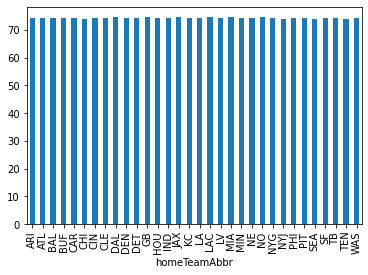

In [49]:
df.groupby('homeTeamAbbr')['height'].mean().plot.bar()

In [28]:
def home(gameId):
    return df.loc[df.gameId == gameId,:]['homeTeamAbbr'].unique()[0]
def visitor(gameId):
    return df.loc[df.gameId == gameId,:]['visitorTeamAbbr'].unique()[0]

In [63]:
gameId = 2021092610
print(home(gameId))

LV


In [29]:
def playmap(gameId, home):
    plt.figure(figsize=(12,8))
    sns.scatterplot(x='x', y='y',hue='playDirection', data=df.loc[df.gameId == gameId,:].loc[df.team == home(gameId),:], s=10, legend = False)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(str(home(gameId)) + ' vs. ' + str(visitor(gameId)))
    plt.show()

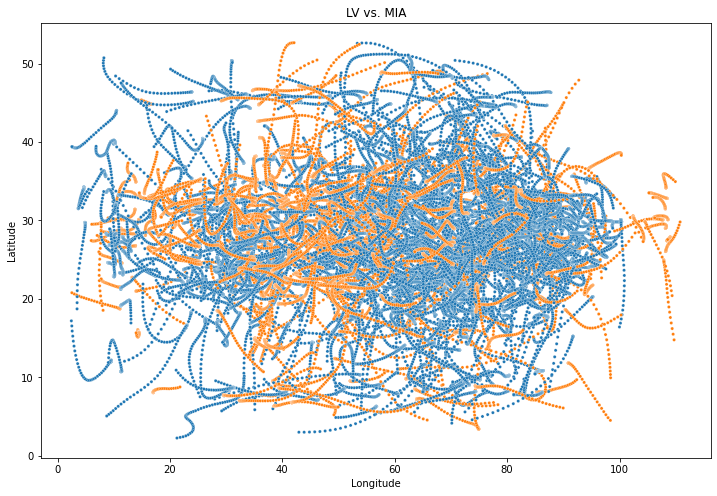

In [30]:
playmap(2021092610,home)

In [68]:
df.head()

,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,...,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock
0,2021090900,97,25511.0,1,2021-09-10T00:26:31.100,12.0,TB,right,37.77,24.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021090900,97,25511.0,2,2021-09-10T00:26:31.200,12.0,TB,right,37.78,24.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021090900,97,25511.0,3,2021-09-10T00:26:31.300,12.0,TB,right,37.78,24.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021090900,97,25511.0,4,2021-09-10T00:26:31.400,12.0,TB,right,37.73,24.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021090900,97,25511.0,5,2021-09-10T00:26:31.500,12.0,TB,right,37.69,24.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
